In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from itertools import product

In [20]:
def power_builder(n, alpha):
    ppf_alpha = norm.ppf(1 - alpha/2)
    def gamma(mu):
        coeff = np.sqrt(n) * (mu / 10)
        return 1 + norm.cdf(-ppf_alpha - coeff) - norm.cdf(ppf_alpha - coeff)
    
    return gamma

In [22]:
def draw_figure(ns, alphas, linspace_tuple = (-1,1,100), save=False):
    mu_space = np.linspace(*linspace_tuple)
    plt.figure(figsize=(10, 10))
    legends = []

    for n, alpha in product(ns, alphas):
        gamma_f = power_builder(n, alpha)
        power = [gamma_f(mu) for mu in mu_space]

        plt.plot(mu_space, power)
        legends.append(f'n: {n}, alpha: {alpha}')
        
    plt.legend(legends)
    if save:
        name = f'powers_plot.png'
        plt.savefig(name)
    
    else:
        plt.show()
    

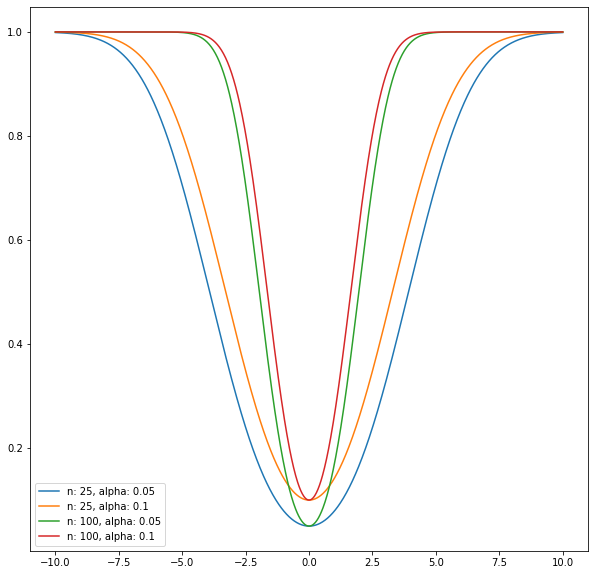

In [26]:
draw_figure([25, 100], [0.05,0.1], linspace_tuple=(-10, 10, 1000))